# MNIST Handwritten Digit Classification with CNN

This notebook demonstrates how to build a Convolutional Neural Network (CNN) to classify handwritten digits (0-9) using the famous MNIST dataset.

In [12]:
# Installation (if needed)
!pip install tensorflow numpy matplotlib seaborn

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.20.0


## 1. Load Data
We use the MNIST dataset available directly in Keras.

In [14]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Number of classes: 10


## 2. Exploratory Data Analysis (EDA)
Let's create a helper function to visualize some examples.

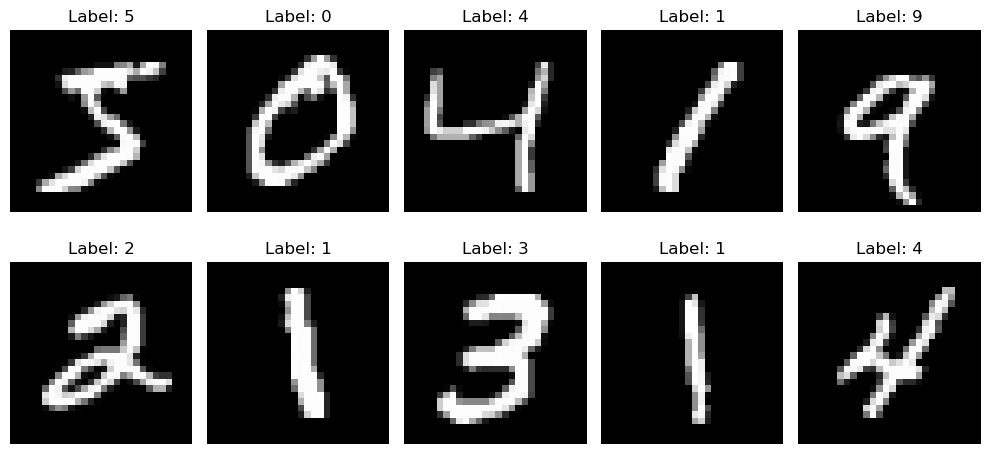

In [15]:
def plot_samples(x, y, rows=2, cols=5):
    plt.figure(figsize=(10, 5))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(x[i], cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_samples(x_train, y_train)

## 3. Data Preprocessing
- **Reshape**: CNNs expect 3D inputs (height, width, channels). MNIST is grayscale, so channels=1.
- **Normalize**: Scale pixel values from [0, 255] to [0, 1].
- **One-hot Encoding**: Convert integer labels to binary class matrices.

In [16]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## 4. Model Development
We will build a Sequential CNN model.
Architecture:
1. Conv2D (32 filters, 3x3 kernel, ReLU)
2. MaxPooling2D (2x2)
3. Conv2D (64 filters, 3x3 kernel, ReLU)
4. MaxPooling2D (2x2)
5. Flatten
6. Dropout (0.5) - to prevent overfitting
7. Dense (10 outputs, Softmax)

In [17]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Training
We use `adam` optimizer and `categorical_crossentropy` loss.

In [18]:
batch_size = 128
epochs = 5  # You can increase this for better accuracy

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8813 - loss: 0.3879 - val_accuracy: 0.9765 - val_loss: 0.0837
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9646 - loss: 0.1162 - val_accuracy: 0.9835 - val_loss: 0.0586
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9733 - loss: 0.0867 - val_accuracy: 0.9882 - val_loss: 0.0462
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9780 - loss: 0.0725 - val_accuracy: 0.9887 - val_loss: 0.0415
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9800 - loss: 0.0644 - val_accuracy: 0.9905 - val_loss: 0.0380


## 6. Evaluation
Let's visualize the training history and evaluate on the test set.

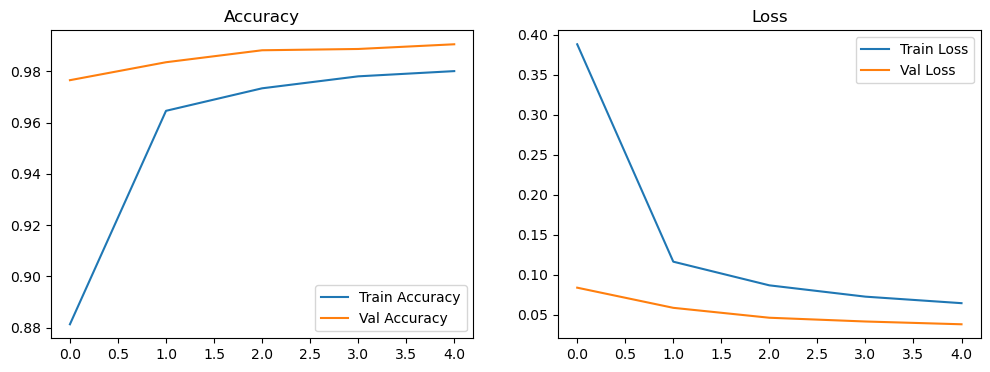

In [19]:
# Plot Training Accuracy & Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.035017985850572586
Test accuracy: 0.9887999892234802


### Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


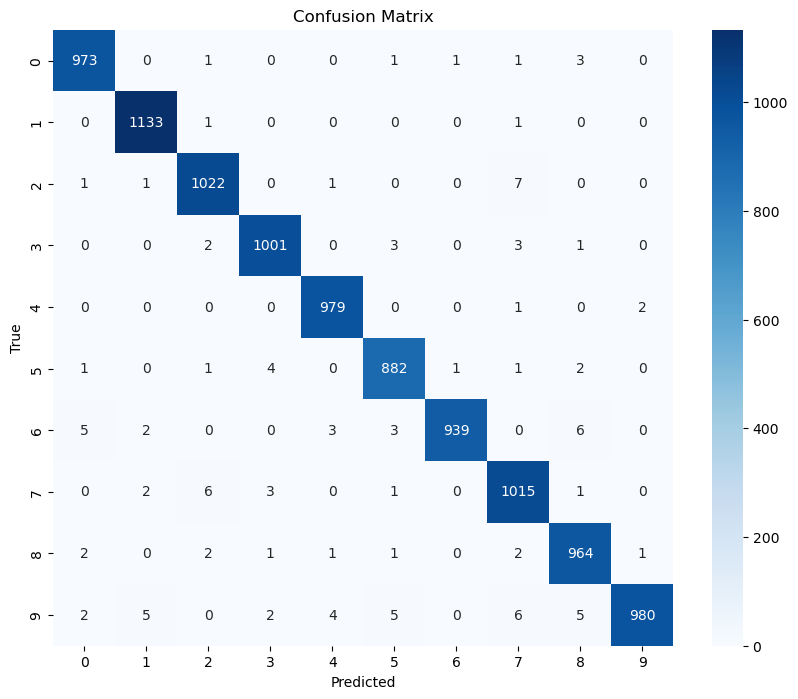

In [21]:
from sklearn.metrics import confusion_matrix

# Predict classes
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Visualize Predictions
Let's see some random test predictions.

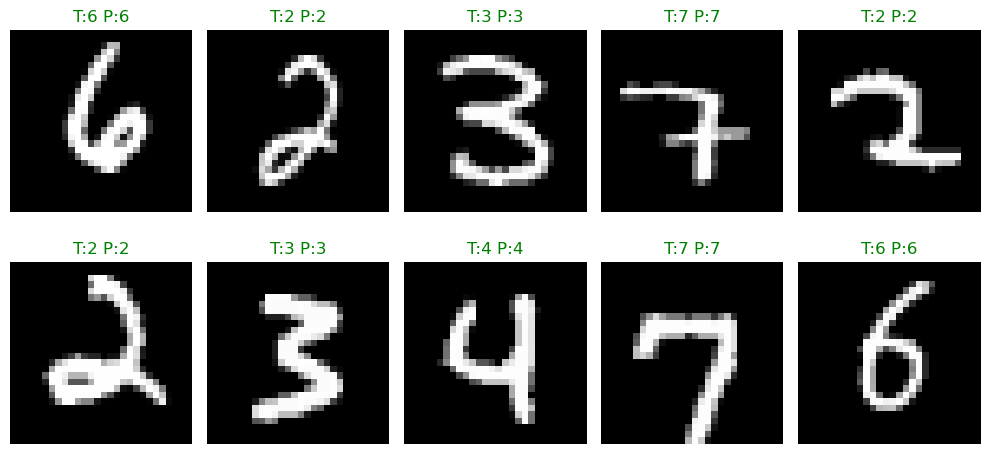

In [22]:
def plot_predictions(x, y_true, y_pred, rows=2, cols=5):
    indices = np.random.choice(len(x), rows * cols, replace=False)
    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(indices):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(x[idx].reshape(28, 28), cmap='gray')
        plt.title(f"T:{y_true[idx]} P:{y_pred[idx]}", color=("green" if y_true[idx] == y_pred[idx] else "red"))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_predictions(x_test, y_true, y_pred_classes)